In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from sklearn.cluster import KMeans
import prince

# Artigo WCDE 2017 

https://sites.google.com/view/wcde/p%C3%A1gina-inicial?authuser=0 

Autores: 
- Thiago Medeiros Barros
- Luiz Affonso Guedes

Título: 
- Análise de Desempenho de Alunos Baseada em Técnicas de Modelagem e Visualização Científica de Dados
- ou Modelagem e Visualização Científica de Dados Educacionais: Estudo de Caso de Desempenho de Alunos em Cursos a Distância

Resumo: a partir das técnicas de visualização do gráfico violino, plot Q-Q e análise de correspondência é verificado que a distribuição de notas de uma dada disciplina não segue uma normal, mas sim uma distribuição bi-modal que pode ser divididas em duas normais 

Dados já foram limpos com um total de 34799 instância com 44 atributos, sendo eles: 
'aluno_exclusivo_rede_publica', 'aluno_id', 'ano_letivo__ano',
       'ano_letivo__ano_aluno', 'categorias', 'cep', 'ch_hora_relogio',
       'codigo_censup', 'codigo_siape', 'descricao', 'descricao_afastamento',
       'descricao_area_residencial', 'descricao_companhia_domiciliar',
       'descricao_estado_civil', 'descricao_historico', 'descricao_imovel',
       'descricao_internet', 'descricao_mae_escolaridade',
       'descricao_pai_escolaridade', 'descricao_raca',
       'descricao_responsavel_escolaridade',
       'descricao_responsavel_financeiro', 'descricao_saude',
       'descricao_situacao_disciplina', 'descricao_situacao_matricula',
       'descricao_trabalho', 'descricao_trabalho_responsavel',
       'ensino_fundamental_conclusao', 'ficou_tempo_sem_estudar',
       'inativo_siape', 'local_acesso_internet', 'media_final',
       'nome_escola_ensino_fundamental', 'nome_escola_ensino_medio',
       'percentual_frequencia', 'periodo_letivo',
       'pessoa_fisica__nascimento_data', 'possui_necessidade_especial',
       'qnt_pc', 'qtd_filhos', 'qtd_pessoas_domicilio',
       'quantidade_smartphones', 'renda_bruta_familiar', 'tempo_sem_estudar''

In [2]:
dados = pd.read_json('dadoslimpos.json')

#exibindo todas as colunas
pd.set_option('display.max_columns', None)

In [5]:
dados.head

<bound method NDFrame.head of        aluno_exclusivo_rede_publica      aluno_id  ano_letivo__ano  \
0                              True  471409825937             2016   
1                              True  471409825937             2016   
10                             True  471409825937             2016   
100                           False  441086102305             2016   
1000                          False  407288366201             2014   
10000                         False  407299518729             2014   
10001                         False  407299518729             2014   
10002                         False  407299518729             2014   
10003                         False  407299518729             2014   
10004                         False  441164170001             2015   
10005                         False  441164170001             2015   
10006                         False  441164170001             2015   
10007                         False  441164170001           

É exibido a distribuição das notas em uma disciplina a partir do gráfico violino (https://en.wikipedia.org/wiki/Violin_plot) e realizado o teste estatístico Q-Q (https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.probplot.html, https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot) se a distribuição se comporta como uma Normal.

A partir dos gráficos abaixo é verificado que as notas não seguem uma distribuição normal, mas, aparentemente, uma distribuição bimodal. 

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


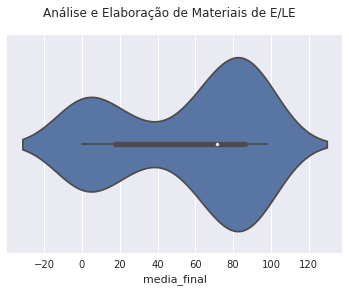

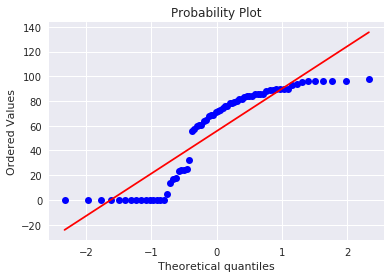

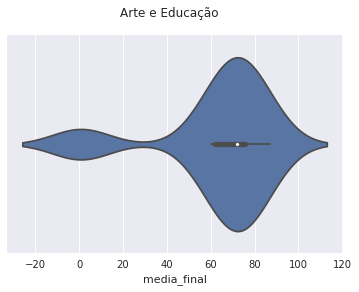

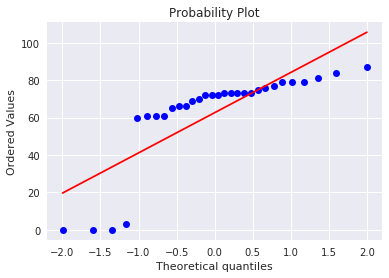

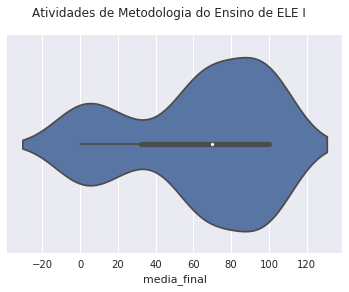

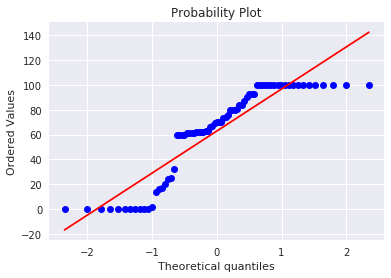

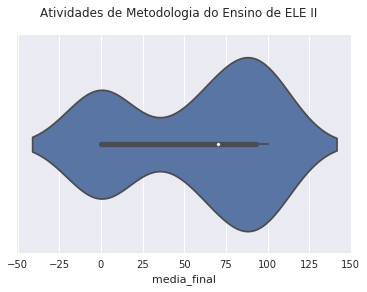

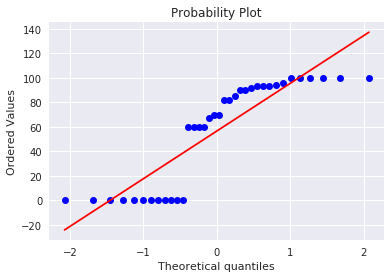

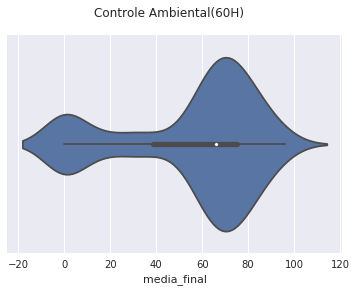

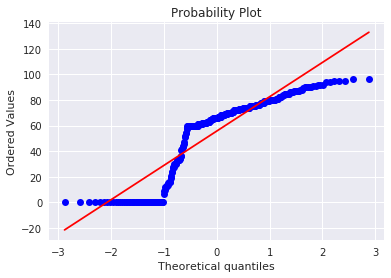

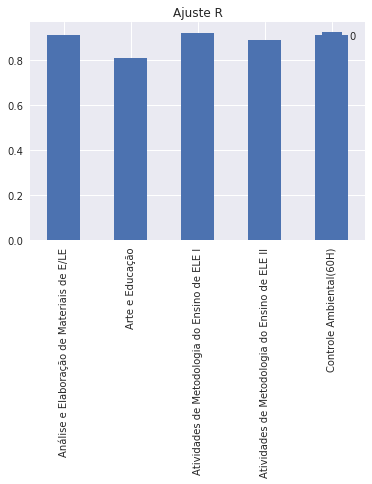

In [6]:
#gerando graficos
%matplotlib inline

plt.close('all')

cnt = 0

#array para guardar o R o qual representa o erro do ajuste com a Normal. Quanto mais próximo de 1, mais próximo está da normal
r = []
i = []

#loop sobre cada disciplina
for index1, group1 in dados.groupby(['descricao_historico']):    
    
    #restrição mínima de 10 instâncias  
    if dados[dados.descricao_historico == index1]['media_final'].count() < 10:
        continue
    
    
    fig = plt.figure()
    sns.plt.suptitle(index1)
    sns.violinplot(dados[dados.descricao_historico == index1]['media_final'])
    
    fig = plt.figure()
    o, res = stats.probplot(dados[dados.descricao_historico == index1]['media_final'], plot=plt)    
    r.append(res[2])
    i.append(index1)
    
    cnt += 1
    if cnt == 5:
        break

df = pd.DataFrame(data=r, index=i)

fig = plt.figure()
df.plot.bar(title='Ajuste R')

É realizado a clusterização utilizando k-means por disciplina em dois grupos (provavelmente alunos aprovado e reprovados). 
É criado dentro do frame um novo atributo chamado 'classe_disciplina', o qual identifica a qual grupo aquele aluno pertence. Para cada grupo é realizado o plot Q-Q, a fim de verificar se é a distribuição segue uma normal. O resultado do ajuste de reta definido pelo R é plotado ao final. 

É verificado um melhor ajuste na classe que possivelmente representa os "Aprovados" a classe com os alunos que possuem notas menores. Um possível motivo pode ser a quantidade de aluno com notas zeros. 

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:889: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/home/ubuntu/anaconda3/lib/python3.6/site-packages/scipy/stats/_stats_mstats_common.py:106: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/ubuntu/anaconda3/lib/python3.6/site-packages/scipy/stats/_stats_mstats_common.py:116: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/home/ubuntu/an

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


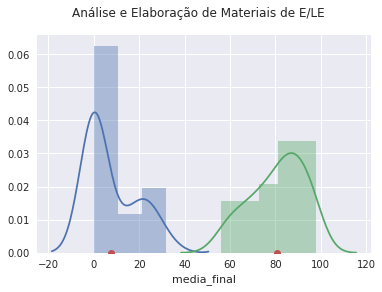

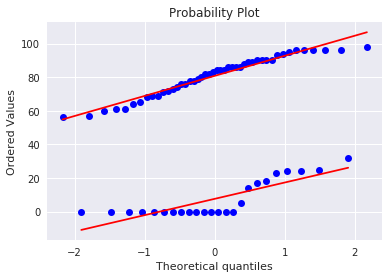

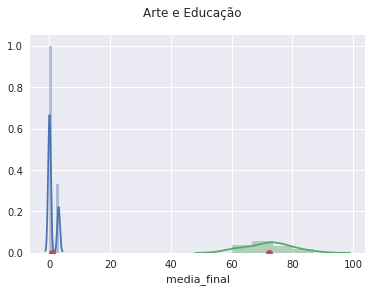

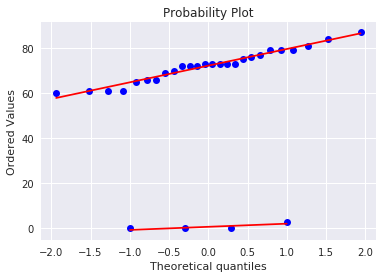

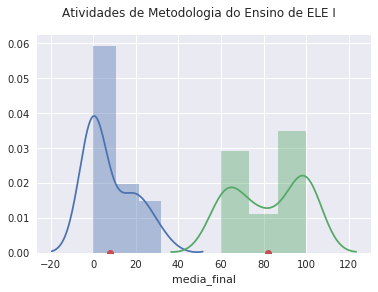

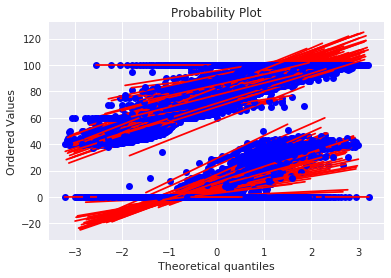

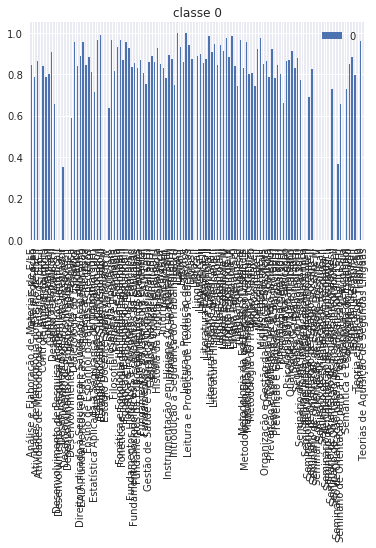

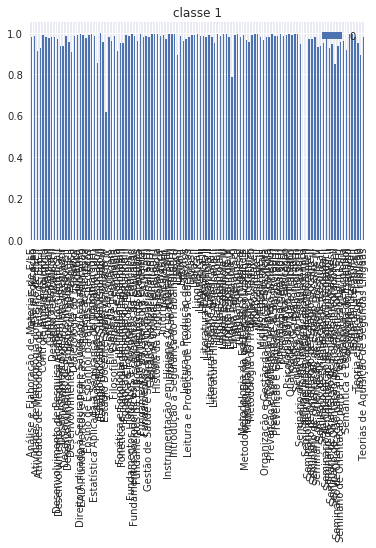

In [7]:
%matplotlib inline
plt.close('all')

#cria coluna 'classe' no frame dados inicializado com -1, a fim de controle
dados['classe_disciplina'] = np.ones(dados.shape[0])*-1

#definir linha que divide os clusters
cnt = 0
r1 = []
r2 = []
i = []

for index1, group1 in dados.groupby(['descricao_historico']):    
    
    #recuperando as notas apenas daquela disciplina    
    data = dados[dados.descricao_historico == index1]['media_final']
    
    #restrição mínima de 10 instâncias  
    if data.count() < 10:
        continue
    
    #recuperando os clusters
    cluster = KMeans(n_clusters=2, init=np.array([[0], [10]]))
    cluster.fit(data.reshape(-1,1))
    #print(cluster.cluster_centers_)
        
    #atribuindo a classe
    dados.loc[dados.descricao_historico == index1, 'classe_disciplina'] = cluster.predict(data.reshape(-1,1))
    
    #controle para exibir os gráficos
    if cnt < 3:    
        #figura mostrando a clusterizacao
        fig = plt.figure()
        sns.plt.suptitle(index1)
        sns.distplot( dados[(dados.descricao_historico == index1) & (dados.classe_disciplina == 0)]['media_final'] )
        sns.distplot( dados[(dados.descricao_historico == index1) & (dados.classe_disciplina == 1)]['media_final'] )
        plt.plot(cluster.cluster_centers_, [0, 0], "o")

        #figura mostrando o ajuste dos dados aos clusters
        fig = plt.figure()

    o, res1 = stats.probplot(dados[(dados.descricao_historico == index1) & (dados.classe_disciplina == 0)]['media_final'], plot=plt)
    o, res2 = stats.probplot(dados[(dados.descricao_historico == index1) & (dados.classe_disciplina == 1)]['media_final'], plot=plt)
    
    r1.append(res1[2])
    r2.append(res2[2])
    i.append(index1)
    
    cnt += 1

df = pd.DataFrame(data=r1, index=i)
fig = plt.figure()
df.plot.bar(title='classe 0')

df = pd.DataFrame(data=r2, index=i)
fig = plt.figure()
df.plot.bar(title='classe 1')

Abaixo é exibido a tabela de contigência entre o atributo "situação da disciplina" e a classe atribuída pelo kmeans. É verificado, como já esperado, uma concentração de aluno aprovados no grupo 1 e uma concentração de alunos reprovados no grupo 0

In [8]:
tbl = pd.crosstab(index = dados.descricao_situacao_disciplina , columns = dados.classe_disciplina, margins=True)
tbl

classe_disciplina,-1.0,0.0,1.0,All
descricao_situacao_disciplina,,,,
Aprovado,81,1168,22221,23470
Aprovado/Reprovado no Módulo,0,46,118,164
Cancelado,2,292,1,295
Dispensado,0,2,0,2
Pendente,0,1,0,1
Reprovado,2,8672,1524,10198
Reprovado por falta,0,14,0,14
Trancado,0,189,1,190
Transferido,0,3,0,3


A fim de ter uma representação gráfica mais interessante, é feito a Análise de Correspondência a fim de visualizar a similaridade entre os atributos.
https://github.com/MaxHalford/Prince/blob/master/examples/CA%20-%20Hair%20color%20and%20eye%20color.ipynb 

In [9]:
tbl = pd.crosstab(index = dados.descricao_situacao_disciplina , columns = dados.classe_disciplina)
ca = prince.CA(tbl, n_components=-1)

(<matplotlib.figure.Figure at 0x7fad175190b8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fad175182e8>)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


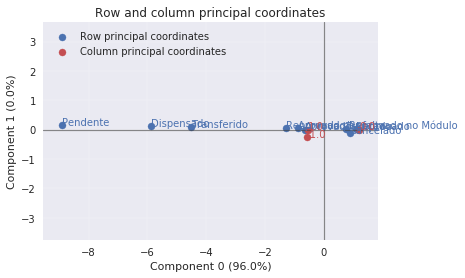

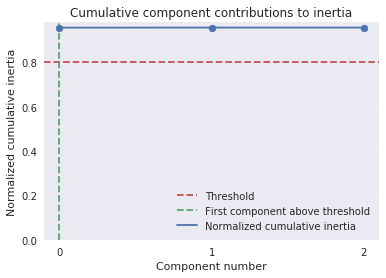

In [10]:
%matplotlib inline

#axes deve ser colocado com "[]"! SE for colocado com () DÁ ERRO
ca.plot_rows_columns(axes=[0, 1] ,show_row_labels=True, show_column_labels=True)

fig = plt.figure()
ca.plot_cumulative_inertia()

In [12]:
#dados.groupby('descricao_situacao_disciplina')['descricao_situacao_disciplina'].count()

dados_clean = dados.groupby('descricao_situacao_disciplina').filter(lambda x: len(x) > 189)
dados_clean.groupby('descricao_situacao_disciplina')['descricao_situacao_disciplina'].count()
tbl = pd.crosstab(index = dados_clean.descricao_situacao_disciplina , columns = dados.classe_disciplina)
tbl

classe_disciplina,-1.0,0.0,1.0
descricao_situacao_disciplina,,,
Aprovado,81,1168,22221
Cancelado,2,292,1
Reprovado,2,8672,1524
Trancado,0,189,1


(<matplotlib.figure.Figure at 0x7fad175bba20>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fad175ba748>)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


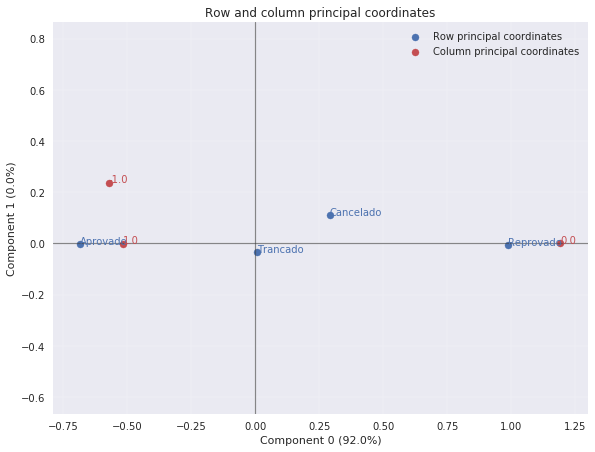

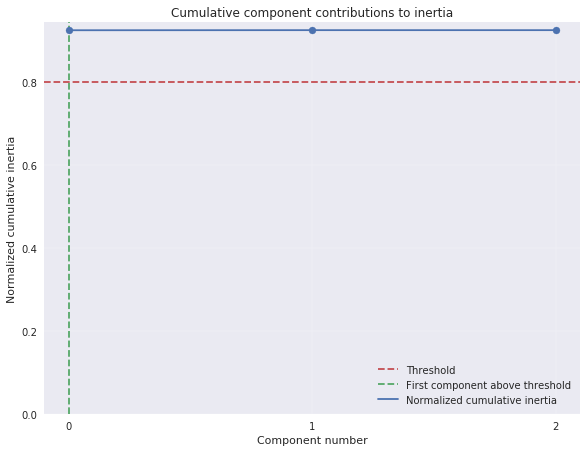

In [13]:
ca = prince.CA(tbl, n_components=-1)

ca.plot_rows_columns(axes=[0, 1] ,show_row_labels=True, show_column_labels=True)
fig = plt.figure()
ca.plot_cumulative_inertia()